In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 

df = pd.read_csv(input)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999999, inplace=True)
arr = df.values

#need to convert to all numerical data!
X = arr[:,[2,3,4,5,6,8,9,10,11,13,14]]
avg_vote = arr[:,7]
avg_metascore = arr[:,12]

features = ["genre","duration","country","language","avg_vote","votes","budget","metascore","reviews_from_users","reviews_from_critics"]
x = df.loc[:, features].values
income = df.loc[:,['worlwide_gross_income']].values

X_train, X_test, y_train, y_test = train_test_split(x, income, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train,y_train)
print(X_train.all)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Check It (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()"""

<built-in method all of numpy.ndarray object at 0x7feb8694be70>


<ipython-input-255-6957f7787874>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [394]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input = "movieData.csv"
df = pd.read_csv(input)
df.dropna(inplace=True)
df = df.drop(['title','original_title'], 1)

df.shape
df.describe()



,year,genre,duration,country,language,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6.079000e+03,6.079000e+03,6.079000e+03,6.079000e+03,6079.000000,6079.000000,6079.000000
mean,2002.781214,2.544662,107.908867,1.609311,1.630367,6.403076,1.023830e+05,3.237311e+07,4.416660e+07,9.461520e+07,54.006416,335.130943,150.038658
std,11.974986,0.665715,18.514651,1.023507,1.085550,0.992271,1.713292e+05,4.066062e+07,6.880418e+07,1.798248e+08,18.030689,516.428664,127.473303
min,1931.000000,1.000000,60.000000,1.000000,1.000000,1.400000,1.150000e+02,5.000000e+03,9.500000e+01,9.500000e+01,1.000000,1.000000,1.000000
25%,1997.000000,2.000000,95.000000,1.000000,1.000000,5.800000,1.384650e+04,7.000000e+06,3.694454e+06,6.918894e+06,41.000000,88.000000,59.000000
50%,2005.000000,3.000000,105.000000,1.000000,1.000000,6.500000,4.307800e+04,1.800000e+07,2.104905e+07,3.155606e+07,54.000000,185.000000,115.000000
75%,2012.000000,3.000000,118.000000,2.000000,2.000000,7.100000,1.150555e+05,4.000000e+07,5.479015e+07,1.006944e+08,67.000000,380.000000,201.000000
max,2020.000000,3.000000,238.000000,14.000000,11.000000,9.300000,2.278845e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,10472.000000,999.000000


[4.60080000e-01 4.57688000e+00 1.55895000e+00 ... 9.34182400e+01
 1.93176979e+03 1.36815240e+02]
MAE:  481.6094235427631
MSE:  1205824.3242305277


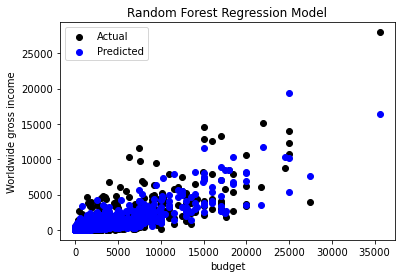

Accuracy: -1598.74 %.
Explained Variance: 0.6716738236905715
Variable: budget               Importance: 0.51
Variable: votes                Importance: 0.25
Variable: reviews_from_users   Importance: 0.1
Variable: duration             Importance: 0.04
Variable: avg_vote             Importance: 0.04
Variable: metascore            Importance: 0.03
Variable: country              Importance: 0.01
Variable: language             Importance: 0.01
Variable: genre                Importance: 0.0


[None, None, None, None, None, None, None, None, None]

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score

features = ["genre","duration","country","language","metascore","votes", "avg_vote","budget","reviews_from_users"]
x = df.loc[:, features]
y = df.loc[:,['worlwide_gross_income']]
x = np.array(x)
# print(x[0,:])
y = np.array(y)
y = y.reshape((y.shape[0],))
y = y/100000
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)



rf = RandomForestRegressor()
rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
x_test[:,7] = x_test[:,7]/100000

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))


plt.scatter(x_test[:,7], y_test, color = "black", label = "Actual")
plt.scatter(x_test[:,7], y_pred, color = "blue", label = "Predicted")
plt.title("Random Forest Regression Model")
plt.xlabel("budget")
plt.ylabel("Worldwide gross income")
plt.legend(loc='best')
plt.show()

errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)


mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

explained_variance_reg = explained_variance_score(y_test, y_pred)

explained_variance_reg = explained_variance_score(y_test, y_pred)
print("Explained Variance:", explained_variance_reg)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]